## 一、准备数据

本文的数据集取自tushare，获取该数据集的方法参考了以下文章。

《https://zhuanlan.zhihu.com/p/109556102》



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers,losses,metrics,callbacks 

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

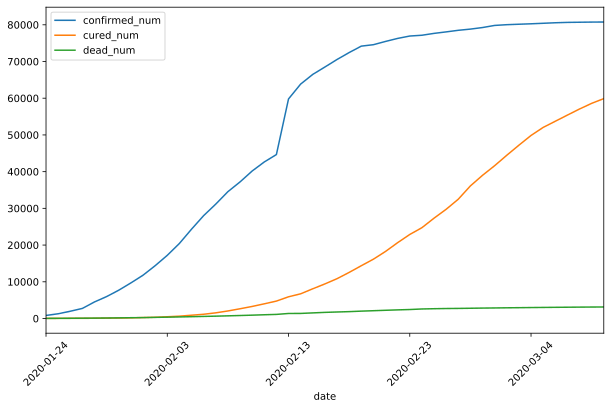

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("./data/covid-19.csv",sep = "\t")
df.plot(x = "date",y = ["confirmed_num","cured_num","dead_num"],figsize=(10,6))
plt.xticks(rotation=45)

In [3]:
df

,date,confirmed_num,cured_num,dead_num
0,2020-01-24,830.0,34.0,25.0
1,2020-01-25,1287.0,38.0,41.0
2,2020-01-26,1975.0,49.0,56.0
3,2020-01-27,2744.0,51.0,80.0
4,2020-01-28,4515.0,60.0,106.0
5,2020-01-29,5974.0,103.0,132.0
6,2020-01-30,7711.0,124.0,170.0
7,2020-01-31,9692.0,171.0,213.0
8,2020-02-01,11791.0,259.0,243.0
9,2020-02-02,14380.0,328.0,304.0


In [4]:
dfdata = df.set_index("date")
dfdiff = dfdata.diff(periods=1).dropna() # 计算列与列之间的差值
dfdiff = dfdiff.reset_index("date")
dfdiff.shape

(46, 4)

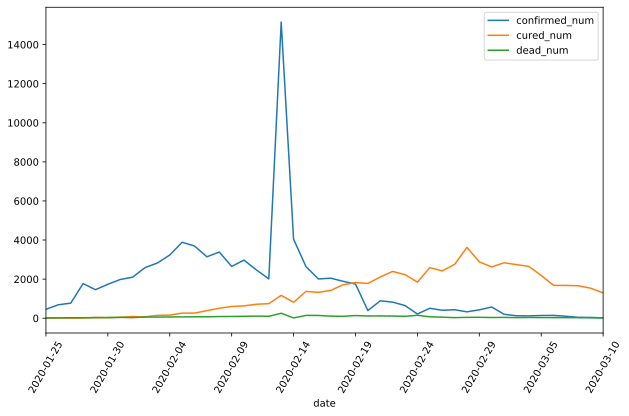

In [5]:
# 每日增量
dfdiff.plot(x = "date",y = ["confirmed_num","cured_num","dead_num"],figsize=(10,6))
plt.xticks(rotation=60)
dfdiff = dfdiff.drop("date",axis = 1).astype("float32")


In [6]:
dfdiff.values

array([[4.5700e+02, 4.0000e+00, 1.6000e+01],
       [6.8800e+02, 1.1000e+01, 1.5000e+01],
       [7.6900e+02, 2.0000e+00, 2.4000e+01],
       [1.7710e+03, 9.0000e+00, 2.6000e+01],
       [1.4590e+03, 4.3000e+01, 2.6000e+01],
       [1.7370e+03, 2.1000e+01, 3.8000e+01],
       [1.9810e+03, 4.7000e+01, 4.3000e+01],
       [2.0990e+03, 8.8000e+01, 3.0000e+01],
       [2.5890e+03, 6.9000e+01, 6.1000e+01],
       [2.8250e+03, 1.4700e+02, 5.7000e+01],
       [3.2330e+03, 1.5700e+02, 6.4000e+01],
       [3.8860e+03, 2.6000e+02, 6.5000e+01],
       [3.6940e+03, 2.6100e+02, 7.3000e+01],
       [3.1430e+03, 3.8700e+02, 7.3000e+01],
       [3.3850e+03, 5.1000e+02, 8.6000e+01],
       [2.6520e+03, 5.9900e+02, 8.9000e+01],
       [2.9730e+03, 6.3200e+02, 9.7000e+01],
       [2.4670e+03, 7.1500e+02, 1.0800e+02],
       [2.0150e+03, 7.4400e+02, 9.7000e+01],
       [1.5151e+04, 1.1710e+03, 2.5400e+02],
       [4.0470e+03, 8.1200e+02, 1.3000e+01],
       [2.6410e+03, 1.3730e+03, 1.4300e+02],
       [2.

In [7]:
#用某日前8天窗口数据作为输入预测该日数据
WINDOW_SIZE = 8

def batch_dataset(dataset):
    dataset_batched = dataset.batch(WINDOW_SIZE,drop_remainder=True)
    return dataset_batched

ds_data = tf.data.Dataset.from_tensor_slices(tf.constant(dfdiff.values,dtype = tf.float32)) \
   .window(WINDOW_SIZE,shift=1).flat_map(batch_dataset)

ds_label = tf.data.Dataset.from_tensor_slices(
    tf.constant(dfdiff.values[WINDOW_SIZE:],dtype = tf.float32))

#数据较小，可以将全部训练数据放入到一个batch中，提升性能
ds_train = tf.data.Dataset.zip((ds_data,ds_label)).batch(38).cache()

In [23]:
list(ds_train)

[(<tf.Tensor: shape=(38, 8, 3), dtype=float32, numpy=
  array([[[4.5700e+02, 4.0000e+00, 1.6000e+01],
          [6.8800e+02, 1.1000e+01, 1.5000e+01],
          [7.6900e+02, 2.0000e+00, 2.4000e+01],
          [1.7710e+03, 9.0000e+00, 2.6000e+01],
          [1.4590e+03, 4.3000e+01, 2.6000e+01],
          [1.7370e+03, 2.1000e+01, 3.8000e+01],
          [1.9810e+03, 4.7000e+01, 4.3000e+01],
          [2.0990e+03, 8.8000e+01, 3.0000e+01]],
  
         [[6.8800e+02, 1.1000e+01, 1.5000e+01],
          [7.6900e+02, 2.0000e+00, 2.4000e+01],
          [1.7710e+03, 9.0000e+00, 2.6000e+01],
          [1.4590e+03, 4.3000e+01, 2.6000e+01],
          [1.7370e+03, 2.1000e+01, 3.8000e+01],
          [1.9810e+03, 4.7000e+01, 4.3000e+01],
          [2.0990e+03, 8.8000e+01, 3.0000e+01],
          [2.5890e+03, 6.9000e+01, 6.1000e+01]],
  
         [[7.6900e+02, 2.0000e+00, 2.4000e+01],
          [1.7710e+03, 9.0000e+00, 2.6000e+01],
          [1.4590e+03, 4.3000e+01, 2.6000e+01],
          [1.7370e+03, 2.1

In [9]:
len(list(ds_data))

39

## 二、定义模型

使用Keras接口有以下3种方式构建模型：使用Sequential按层顺序构建模型，使用函数式API构建任意结构模型，继承Model基类构建自定义模型。

此处选择使用函数式API构建任意结构模型。

In [10]:
#考虑到新增确诊，新增治愈，新增死亡人数数据不可能小于0，设计如下结构
class Block(layers.Layer):
    def __init__(self, **kwargs):
        super(Block, self).__init__(**kwargs)
    
    def call(self, x_input,x):
        x_out = tf.maximum((1+x)*x_input[:,-1,:],0.0)
        return x_out
    
    def get_config(self):  
        config = super(Block, self).get_config()
        return config

In [11]:
tf.keras.backend.clear_session()
x_input = layers.Input(shape = (None,3),dtype = tf.float32)
x = layers.LSTM(3,return_sequences = True,input_shape=(None,3))(x_input)
x = layers.LSTM(3,return_sequences = True,input_shape=(None,3))(x)
x = layers.LSTM(3,return_sequences = True,input_shape=(None,3))(x)
x = layers.LSTM(3,input_shape=(None,3))(x)
x = layers.Dense(3)(x)

#考虑到新增确诊，新增治愈，新增死亡人数数据不可能小于0，设计如下结构
#x = tf.maximum((1+x)*x_input[:,-1,:],0.0)
x = Block()(x_input,x)
model = models.Model(inputs = [x_input],outputs = [x])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, None, 3)      84          input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, None, 3)      84          lstm[0][0]                       
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, None, 3)      84          lstm_1[0][0]                     
_______________________________________________________________________________________

## 三、训练模型

训练模型通常有3种方法，内置fit方法，内置train_on_batch方法，以及自定义训练循环。此处我们选择最常用也最简单的内置fit方法。

注：循环神经网络调试较为困难，需要设置多个不同的学习率多次尝试，以取得较好的效果。

In [12]:
#自定义损失函数，考虑平方差和预测目标的比值
class MSPE(losses.Loss):
    def call(self,y_true,y_pred):
        err_percent = (y_true - y_pred)**2/(tf.maximum(y_true**2,1e-7))
        mean_err_percent = tf.reduce_mean(err_percent)
        return mean_err_percent
    
    def get_config(self):
        config = super(MSPE, self).get_config()
        return config

In [13]:
import os
import datetime

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss=MSPE(name = "MSPE"))

stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join('data', 'autograph', stamp)

## 在 Python3 下建议使用 pathlib 修正各操作系统的路径
# from pathlib import Path
# stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = str(Path('./data/autograph/' + stamp))

tb_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
#如果loss在100个epoch后没有提升，学习率减半。
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor = 0.5, patience = 100)
#当loss在200个epoch后没有提升，则提前终止训练。
stop_callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience= 200)
callbacks_list = [tb_callback,lr_callback,stop_callback]

history = model.fit(ds_train,epochs=500,callbacks = callbacks_list)

Epoch 1/500
1/1 [==============================] - 0s 15ms/step - loss: 3.3592
Epoch 2/500
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 6ms/step - loss: 3.1376
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 2.9109
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 2.6768
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 2.4347
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1853
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.9297
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.6703
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4109
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1580
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9209
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 102/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 103/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 104/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 105/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 106/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 107/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 108/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 109/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 110/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 111/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 112/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 113/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 204/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 205/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 206/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 207/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 208/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 209/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 210/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 211/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 212/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 213/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 214/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 215/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 306/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4467
Epoch 307/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 308/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 309/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 310/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 311/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 312/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 313/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 314/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4467
Epoch 315/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4467
Epoch 316/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4467
Epoch 317/500
1/1 [==============================] - 0

## 四、评估模型

评估模型一般要设置验证集或者测试集，由于此例数据较少，我们仅仅可视化损失函数在训练集上的迭代情况。

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.title('Training '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric])
    plt.show()


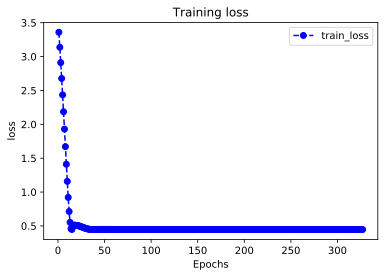

In [15]:
plot_metric(history,"loss")

## 五、使用模型

此处我们使用模型预测疫情结束时间，即 新增确诊病例为0 的时间。

In [16]:
#使用dfresult记录现有数据以及此后预测的疫情数据
dfresult = dfdiff[["confirmed_num","cured_num","dead_num"]].copy()
dfresult.tail()

,confirmed_num,cured_num,dead_num
41,143.0,1681.0,30.0
42,99.0,1678.0,28.0
43,44.0,1661.0,27.0
44,40.0,1535.0,22.0
45,19.0,1297.0,17.0


In [17]:
#预测此后100天的新增走势,将其结果添加到dfresult中
for i in range(100):
    arr_predict = model.predict(tf.constant(tf.expand_dims(dfresult.values[-38:,:],axis = 0)))

    dfpredict = pd.DataFrame(tf.cast(tf.floor(arr_predict),tf.float32).numpy(),
                columns = dfresult.columns)
    dfresult = dfresult.append(dfpredict,ignore_index=True)

In [18]:
dfresult.query("confirmed_num==0").head()

# 第55天开始新增确诊降为0，第45天对应3月10日，也就是10天后，即预计3月20日新增确诊降为0
# 注：该预测偏乐观

,confirmed_num,cured_num,dead_num
50,0.0,1426.0,0.0
51,0.0,1453.0,-0.0
52,0.0,1481.0,0.0
53,0.0,1509.0,-0.0
54,0.0,1538.0,0.0


In [19]:
dfresult.query("cured_num<10").head()

# 第164天开始新增治愈降为0，第45天对应3月10日，也就是大概4个月后，即7月10日左右全部治愈。
# 注: 该预测偏悲观，并且存在问题，如果将每天新增治愈人数加起来，将超过累计确诊人数。

,confirmed_num,cured_num,dead_num
0,457.0,4.0,16.0
2,769.0,2.0,24.0
3,1771.0,9.0,26.0


In [20]:
dfresult.query("dead_num==0").head()

# 第60天开始，新增死亡降为0，第45天对应3月10日，也就是大概15天后，即20200325
# 该预测较为合理

,confirmed_num,cured_num,dead_num
46,10.0,1322.0,0.0
47,5.0,1347.0,-0.0
48,2.0,1373.0,0.0
49,1.0,1399.0,-0.0
50,0.0,1426.0,0.0


## 六、保存模型

推荐使用TensorFlow原生方式保存模型。

In [21]:
model.save('./data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./data/tf_model_savedmodel/assets
export saved model.


In [22]:
model_loaded = tf.keras.models.load_model('./data/tf_model_savedmodel',compile=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_loaded.compile(optimizer=optimizer,loss=MSPE(name = "MSPE"))
model_loaded.predict(ds_train)

array([[1104.1805  ,   87.7098  ,    0.      ],
       [1361.9454  ,   68.77245 ,    0.      ],
       [1486.0934  ,  146.51523 ,    0.      ],
       [1700.722   ,  156.48225 ,    0.      ],
       [2044.2332  ,  259.14258 ,    0.      ],
       [1943.2314  ,  260.13928 ,    0.      ],
       [1653.3774  ,  385.7238  ,    0.      ],
       [1780.6818  ,  508.31815 ,    0.      ],
       [1395.0865  ,  597.02466 ,    0.      ],
       [1563.9489  ,  629.91583 ,    0.      ],
       [1297.7672  ,  712.6421  ,    0.      ],
       [1059.9923  ,  741.54645 ,    0.      ],
       [7970.195   , 1167.1383  ,    0.      ],
       [2128.9275  ,  809.3222  ,    0.      ],
       [1389.3     , 1368.4722  ,    0.      ],
       [1056.3099  , 1318.6371  ,    0.      ],
       [1077.3519  , 1420.3007  ,    0.      ],
       [ 993.18384 , 1702.3674  ,    0.      ],
       [ 920.06274 , 1817.9849  ,    0.      ],
       [ 205.68584 , 1773.1333  ,    0.      ],
       [ 467.65912 , 2102.0452  ,    0. 